<a href="https://colab.research.google.com/github/AnnPike/final-project-ML/blob/master/Visualisation_of_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pickle
import matplotlib.pyplot as plt
save_to = "/content/gdrive/My Drive/nets_to_compute_smoothness/"

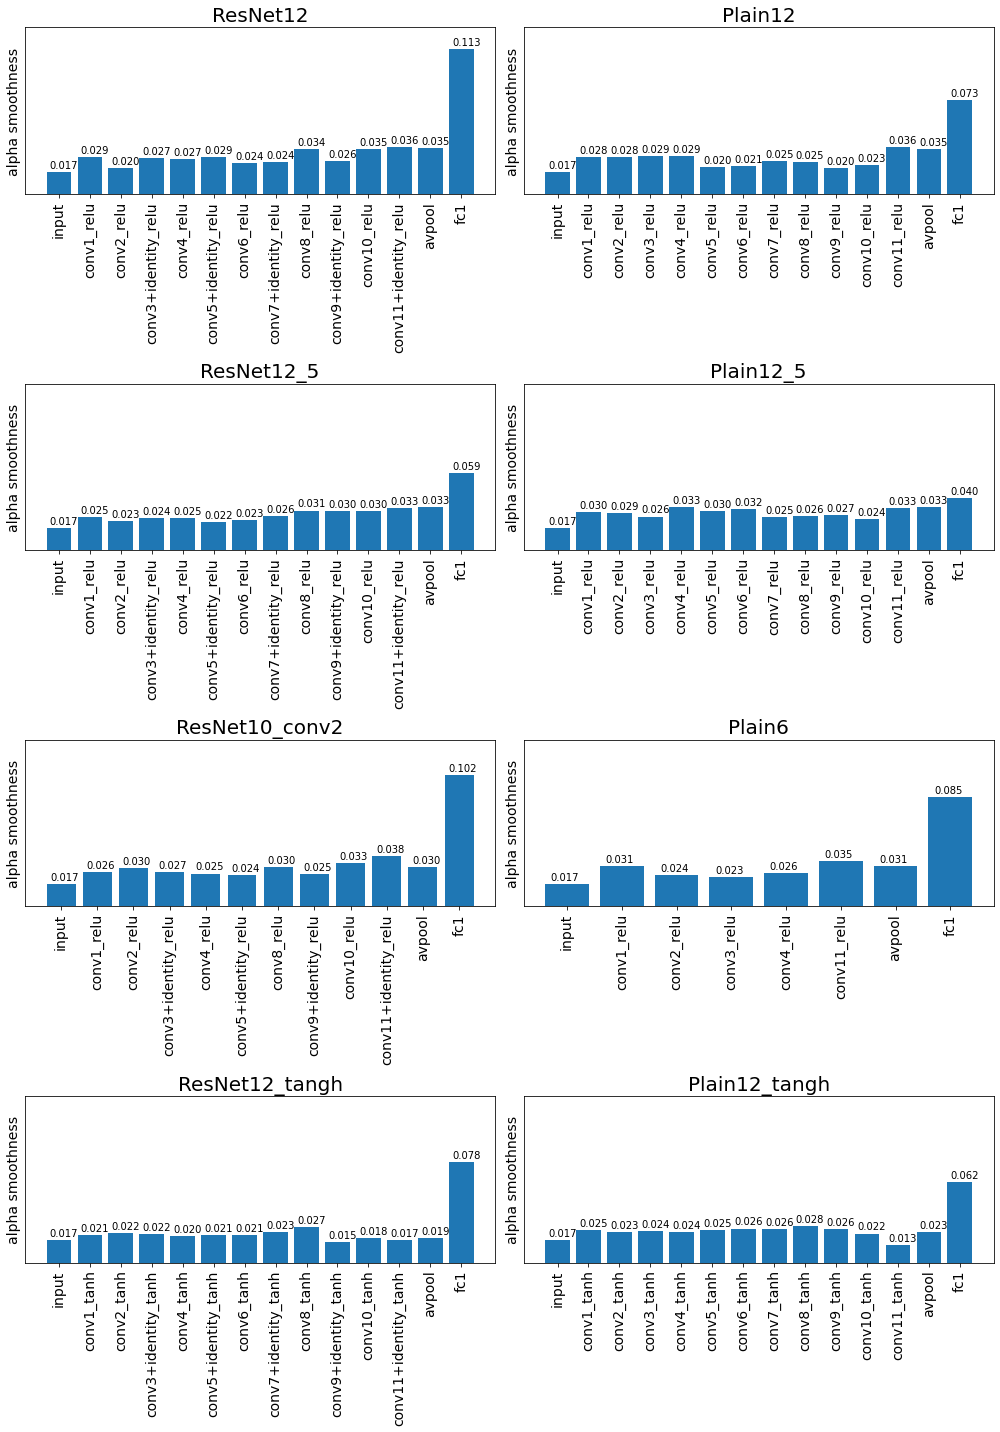

In [5]:
plt.figure(figsize=(14,20))
for idx, net in enumerate(['ResNet12','Plain12', 'ResNet12_5', 'Plain12_5','ResNet10_conv2', 'Plain6', 'ResNet12_tangh', 'Plain12_tangh']): 
  alpha_dict = pickle.load(open(save_to+'alpha_dict_'+net,'rb'))
  ax = plt.subplot(4,2,idx+1)
  ax.bar(list(alpha_dict.keys()), height=list(alpha_dict.values()))
  for i, v in enumerate(list(alpha_dict.values())):
    ax.text(i-0.3, v+0.003, str(v)[:5], color='k')
  plt.ylim([0,0.13])
  plt.xticks(rotation=90, fontsize=14)
  plt.yticks([])
  plt.ylabel('alpha smoothness', fontsize=14)
  plt.title(net, fontsize=20)

plt.tight_layout()
plt.show()

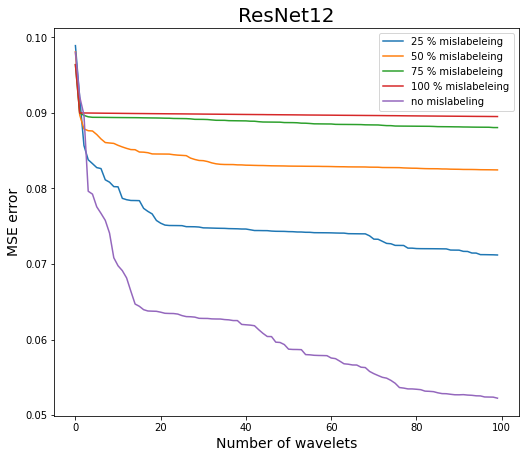

In [ ]:
plt.figure(figsize=(14,12))
for idx, net in enumerate(['ResNet12']):
    plt.subplot(2, 2, idx+1)
    MSE_errors_no_misslab = pickle.load(open(save_to+'MSE_errors_no_misslab_'+net,'rb'))
    for mislab in [0.25,0.5, 0.75, 1]:
      MSE_errors = pickle.load(open(save_to+'MSE_mislab_'+str(mislab)+'_'+net,'rb'))
      plt.plot(MSE_errors,label = str(int(mislab*100))+' % mislabeleing')
    plt.plot(MSE_errors_no_misslab,label = 'no mislabeling')
    plt.ylabel('MSE error', fontsize=14)
    plt.xlabel('Number of wavelets', fontsize=14)
    plt.title(net, fontsize=20)
    plt.legend()
plt.tight_layout()
plt.show()

[0.11340614057566588, 0.046786776107884114, 0.020609485892542294, 0.007922854257887883, 0.004640385634782675]


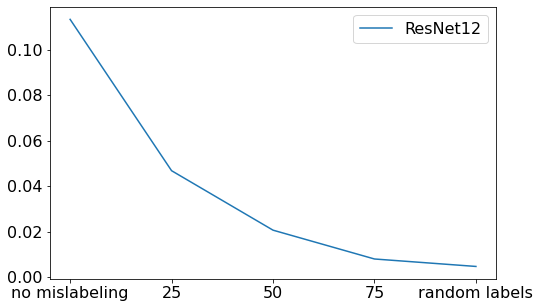

In [ ]:
plt.figure(figsize=(8,5))
for net in ['ResNet12']:
  alpha_dict = pickle.load(open(save_to+'alpha_dict_'+net,'rb'))
  alpha_list = pickle.load(open(save_to+'alpha_list_mislab'+'_'+net,'rb'))
  alpha_list.insert(0, alpha_dict['fc1']) 
  print(alpha_list)
  plt.plot(['no mislabeling', 25,50,75,'random labels'],alpha_list, label=net)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend(fontsize=16)
  plt.show

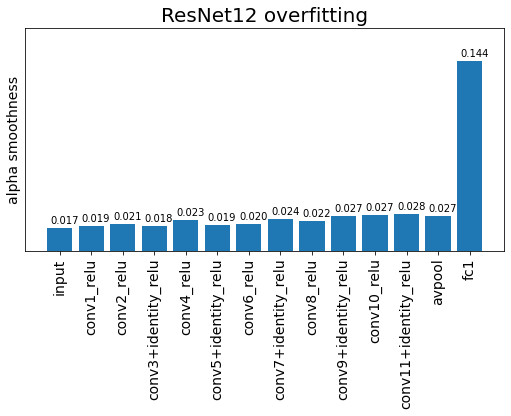

In [9]:
plt.figure(figsize=(14,20))
for idx, net in enumerate(['ResNet12_overfitting_100']): 
  alpha_dict = pickle.load(open(save_to+'alpha_dict_'+net,'rb'))
  ax = plt.subplot(4,2,idx+1)
  ax.bar(list(alpha_dict.keys()), height=list(alpha_dict.values()))
  for i, v in enumerate(list(alpha_dict.values())):
    ax.text(i-0.3, v+0.003, str(v)[:5], color='k')
  plt.ylim([0,0.17])
  plt.xticks(rotation=90, fontsize=14)
  plt.yticks([])
  plt.ylabel('alpha smoothness', fontsize=14)
  plt.title('ResNet12 overfitting', fontsize=20)

plt.tight_layout()
plt.show()